In [1]:
from model import Fitness

# Data visualization tools.
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable("vegafusion")
alt.renderers.enable("jupyter")

RendererRegistry.enable('jupyter')

In [2]:
modelNone = Fitness(200, 20, 20, abundance=0.25, mutation=False, choosy=False)
modelC = Fitness(200, 20, 20, abundance=0.25, mutation=False, choosy=True)
modelM = Fitness(200, 20, 20, abundance=0.25, mutation=True, choosy=False)
modelMC = Fitness(200, 20, 20, abundance=0.25, mutation=True, choosy=True)

for _ in range(10000):
    modelNone.step()
    modelC.step()
    modelM.step()
    modelMC.step()

modelNone_data = modelNone.datacollector.get_model_vars_dataframe()
modelNone_agent_data = modelNone.datacollector.get_agent_vars_dataframe()

modelC_data = modelC.datacollector.get_model_vars_dataframe()
modelC_agent_data = modelC.datacollector.get_agent_vars_dataframe()

modelM_data = modelM.datacollector.get_model_vars_dataframe()
modelM_agent_data = modelM.datacollector.get_agent_vars_dataframe()

modelMC_data = modelMC.datacollector.get_model_vars_dataframe()
modelMC_agent_data = modelMC.datacollector.get_agent_vars_dataframe()

In [3]:
# print(agent_data)

# agent_data.to_csv('agent_data_output.csv')

In [4]:
model_names = ["No Mutation No Choice", "Choice", "Mutation", "Mutation Choice"]
models = [modelNone_data, modelC_data, modelM_data, modelMC_data]

for i, model in enumerate(models):
    model.index.rename('step', inplace=True)
    model.reset_index(inplace=True)
    models[i] = model.assign(model_type=model_names[i])

In [5]:
for model in models:
    print(model.loc[0])

step                                         0
Avg Fitness                          -0.053046
Population                                 200
carrier_none_pop                           100
carrier_choosy_pop                           0
giver_none_pop                             100
carrier_none_births                        100
carrier_none_deaths                          0
carrier_choosy_births                        0
carrier_choosy_deaths                        0
giver_none_births                          100
giver_none_deaths                            0
model_type               No Mutation No Choice
Name: 0, dtype: object
step                            0
Avg Fitness             -0.029129
Population                    200
carrier_none_pop               50
carrier_choosy_pop             50
giver_none_pop                100
carrier_none_births            50
carrier_none_deaths             0
carrier_choosy_births          50
carrier_choosy_deaths           0
giver_none_births         

In [6]:
model_data_full = pd.concat(models).reset_index()
model_data_full

,index,step,Avg Fitness,Population,carrier_none_pop,carrier_choosy_pop,giver_none_pop,carrier_none_births,carrier_none_deaths,carrier_choosy_births,carrier_choosy_deaths,giver_none_births,giver_none_deaths,model_type
0,0,0,-0.053046,200,100,0,100,100,0,0,0,100,0,No Mutation No Choice
1,1,1,-0.053046,200,100,0,100,100,0,0,0,100,0,No Mutation No Choice
2,2,2,-0.053046,200,100,0,100,0,0,0,0,0,0,No Mutation No Choice
3,3,3,-0.053046,200,100,0,100,0,0,0,0,0,0,No Mutation No Choice
4,4,4,-0.053046,200,100,0,100,0,0,0,0,0,0,No Mutation No Choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999,9996,9996,1.900379,550,0,277,273,0,0,0,1,0,1,Mutation Choice
40000,9997,9997,1.900379,550,0,277,273,0,0,0,0,0,0,Mutation Choice
40001,9998,9998,1.900252,549,0,276,273,0,0,0,1,0,0,Mutation Choice
40002,9999,9999,1.900124,548,0,275,273,0,0,0,1,0,0,Mutation Choice


<Axes: xlabel='step', ylabel='Avg Fitness'>

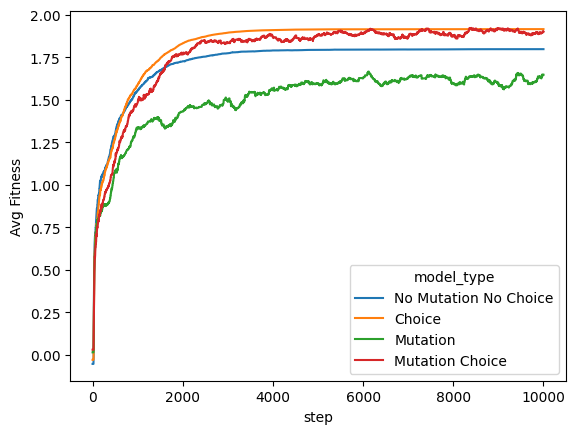

In [7]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Avg Fitness",
    hue="model_type"
)


<Axes: xlabel='step', ylabel='Population'>

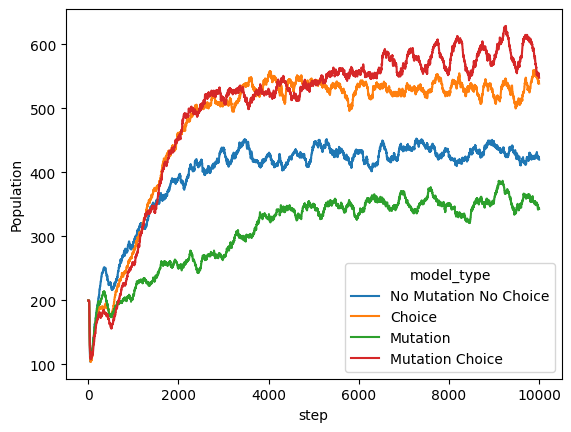

In [8]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Population",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='carrier_none_pop'>

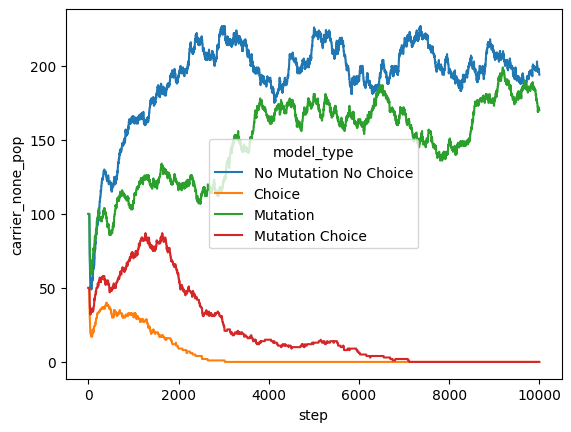

In [9]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="carrier_none_pop",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='carrier_none_deaths'>

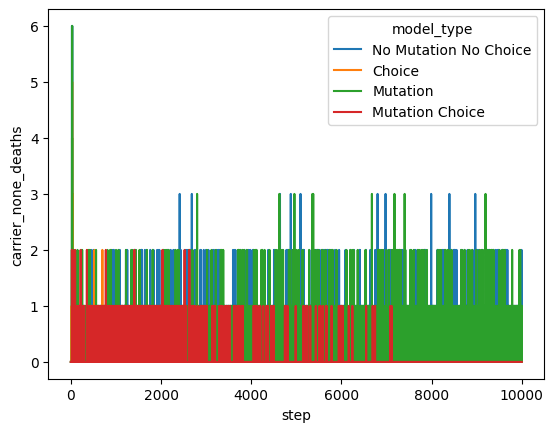

In [20]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="carrier_none_deaths",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='carrier_choosy_pop'>

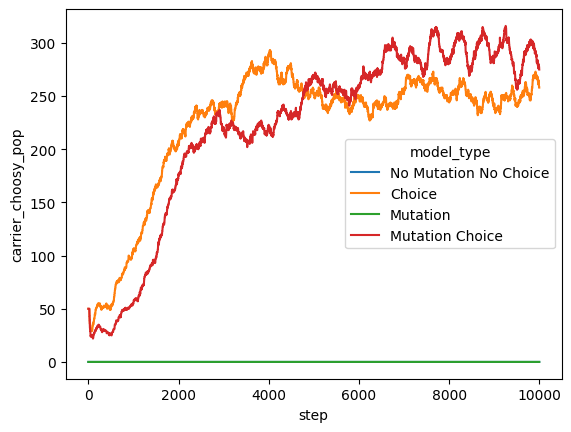

In [15]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="carrier_choosy_pop",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='giver_none_pop'>

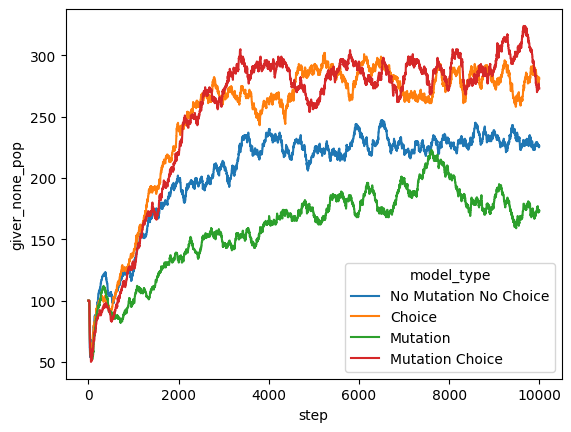

In [10]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="giver_none_pop",
    hue="model_type"
)

In [11]:
agent_data = [modelNone_agent_data, modelC_agent_data, modelM_agent_data, modelMC_agent_data]
time_points = [0, 3333, 6666, 10000]

def make_plot(data, time):
    plot = alt.Chart(data.loc[time, ["Fitness", "Role"]]).mark_bar(
        opacity=0.5,
        binSpacing=0
    ).encode(
        alt.X("Fitness:Q").bin(maxbins=20),
        alt.Y('count()').stack(None),
        color='Role:N'
    )
    return plot

In [16]:
make_plot(agent_data[3], time_points[0])

JupyterChart()

In [17]:
make_plot(agent_data[3], time_points[1])

JupyterChart()

In [18]:
make_plot(agent_data[3], time_points[2])

JupyterChart()

In [19]:
make_plot(agent_data[3], time_points[3])

JupyterChart()